---

# Advanced `pandas`

In [1]:
import pandas as pd

In [2]:
loans = pd.read_csv("./data/loans.csv")

loans.head()

,id,loan_amnt,term,issue_d,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,purpose
0,130956066,3000.0,36 months,Mar-2018,7.34,93.10,A,A4,Scale Technician,9 years,RENT,52000.0,major_purchase
1,130968727,5000.0,36 months,Mar-2018,11.98,166.03,B,B5,SDO Supervisor,10+ years,OWN,55000.0,other
2,130962380,20300.0,60 months,Mar-2018,17.47,509.66,D,D1,Administrative Assistant,< 1 year,RENT,55000.0,credit_card
3,130966492,30000.0,36 months,Mar-2018,21.85,1143.39,D,D5,teacher,10+ years,OWN,57000.0,debt_consolidation
4,130945448,5000.0,36 months,Mar-2018,5.31,150.56,A,A1,Clerical,2 years,RENT,36610.0,credit_card


## Categorical data

Generally, text columns should be converted to `string` types.

However, if a column is categorical, we have a special data type we can use.

Why would we want to do that?

- the special `category` data type uses less memory
- we can also specify the order of the categories

Let's look at the first reason:

In [ ]:
loans["term"].memory_usage(deep=True)

Converting to `string` doesn't save any memory:

In [ ]:
loans["term"].astype("string").memory_usage(deep=True)

But converting it to a `category`:

In [ ]:
loans["term"].astype("category")

In [ ]:
loans["term"].astype("category").memory_usage(deep=True)

Let's take employment length as an example of an *ordered* categorical column:

In [ ]:
loans["emp_length"].value_counts().sort_index()

These aren't in the right order and sorting in ascending or descending order doesn't fix it.

In [ ]:
sorted(loans["emp_length"].dropna().unique())

In [138]:
emp_dtype = pd.CategoricalDtype(['< 1 year', '1 year', '2 years',
                                 '3 years', '4 years', '5 years',
                                 '6 years', '7 years', '8 years',
                                 '9 years', '10+ years'], ordered=True)
loans["emp_length"].astype(emp_dtype)

0          9 years
1        10+ years
2         < 1 year
3        10+ years
4          2 years
           ...    
42832    10+ years
42833       1 year
42834    10+ years
42835      3 years
42836    10+ years
Name: emp_length, Length: 42837, dtype: category
Categories (11, object): ['< 1 year' < '1 year' < '2 years' < '3 years' ... '7 years' < '8 years' < '9 years' < '10+ years']

What if we look at the `.value_counts()` now?

In [139]:
loans["emp_length"].astype(emp_dtype).value_counts().sort_index()
loans

,id,loan_amnt,term,issue_d,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,purpose
0,130956066,3000.0,36 months,Mar-2018,7.34,93.10,A,A4,Scale Technician,9 years,RENT,52000.0,major_purchase
1,130968727,5000.0,36 months,Mar-2018,11.98,166.03,B,B5,SDO Supervisor,10+ years,OWN,55000.0,other
2,130962380,20300.0,60 months,Mar-2018,17.47,509.66,D,D1,Administrative Assistant,< 1 year,RENT,55000.0,credit_card
3,130966492,30000.0,36 months,Mar-2018,21.85,1143.39,D,D5,teacher,10+ years,OWN,57000.0,debt_consolidation
4,130945448,5000.0,36 months,Mar-2018,5.31,150.56,A,A1,Clerical,2 years,RENT,36610.0,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42832,130852914,30000.0,36 months,Apr-2018,15.04,1040.55,C,C4,FINANCIAL MANAGER,10+ years,MORTGAGE,64577.0,credit_card
42833,130537040,25000.0,60 months,Apr-2018,11.98,555.86,B,B5,General Manager,1 year,MORTGAGE,110000.0,debt_consolidation
42834,130613820,35000.0,36 months,Apr-2018,9.92,1128.04,B,B2,Police Lt.,10+ years,MORTGAGE,100000.0,other
42835,130426636,12300.0,36 months,Apr-2018,9.92,396.43,B,B2,After-school coordinator,3 years,MORTGAGE,112000.0,debt_consolidation


## Reshaping

There are a few methods built in to `pandas` to help reshape your data.

Read all about them here: https://pandas.pydata.org/docs/user_guide/reshaping.html

One important one is to cross-reference categorical columns.

For example, what is the distribution of loan grades across different types of home owners?

In [ ]:
loans.pivot_table(index="home_ownership",
                  columns="grade",
                  values="id",
                  aggfunc="count"
                  )

`.crosstab()` does the same thing but has more limited options (but you could specify data from different sources since it's not tied to a single `DataFrame`). Different methods have different pros and cons!

In [ ]:
pd.crosstab(index=loans["home_ownership"],
            columns=loans["grade"])

Both methods allow you to specify what aggregation goes into the cells.

We could look at the average loan amount for different combinations of home ownership and grade:

In [ ]:
loans.pivot_table(index="home_ownership",
                  columns="grade",
                  values="loan_amnt",
                  aggfunc="mean"
                  )

Incidentally, this is where heatmaps come in handy

In [ ]:
import seaborn as sns

avg_by_home_and_grade = loans.pivot_table(index="home_ownership",
                                          columns="grade",
                                          values="loan_amnt",
                                          aggfunc="mean"
                                         )

_ = sns.heatmap(
    data=avg_by_home_and_grade,
    vmin=0,
    cmap="Greens",
    square=True
)

## Custom methods

Sometimes you want to perform a calculation on a column that's more advanced than what's already built in.

In these cases you can use the general `.apply` method, which applies a custom function to all rows.

Compared to other `pandas` operations, this is *slow*, but it's still quicker than using a loop.

Suppose we have rules for what makes a loan a "special" case:

- grade has to be B
- interest rate over 10%
- job title is "Accountant"

and we want to label our data with these rules.

Let's see the custom function approach.

When we write a custom function, the argument is either:

- a single value (if we want to apply the function to a single row or column)
- an entire row (or column) of data

In [ ]:
def is_special_loan(row):
    # only returns True if all conditions are met
    return row["grade"] == "B" and row["int_rate"] > 10 and row["emp_title"] == "Accountant"

We can then pass the function to `.apply` making sure `axis` is set to 1 (apply the function to each row), not 1 (which applies the function to each column)

In [ ]:
%%timeit

loans.apply(is_special_loan, axis=1)

Of course, we could have done this with "raw" `pandas` in a vectorised way:

In [ ]:
%%timeit

loans[(loans["grade"] == "B") & (loans["int_rate"] > 10) & (loans["emp_title"] == "Accountant")]

***Takeaway: only use `.apply` if there is no built-in `pandas` equivalent to what you want to do!***

## Method chaining

To really improve your `pandas` code, you can make use of **method chaining**.

This is when you add methods one after another, which you can do because `pandas` returns a copy of the `DataFrame` each time.

A classic read on the subject is here (a bit dated since `pandas` has much newer versions, but the ideas stand): https://tomaugspurger.net/posts/method-chaining/.

Consider this example:

In [ ]:
loans_1 = pd.read_csv("./data/loans.csv")

loans_1["installment_pct"] = loans_1["installment"] / loans_1["loan_amnt"]

# do we want to overwrite the raw loans data?
# or create loans_2?
loans_1 = loans_1.dropna(subset=["emp_length"])

loans_1["emp_length"] = loans_1["emp_length"].astype(emp_dtype)

income_by_emp = loans_1.groupby("emp_length")["annual_inc"].mean().sort_index(ascending=False)

_ = income_by_emp.plot(kind="barh")

You could also do all those operations in a single block:

- more readable
- steps are logically listed in the same place
- you don't overwrite the source data

In [ ]:
loans_1 = pd.read_csv("./data/loans.csv")

_ = (
    loans_1
    .assign(
        installment_pct=lambda df_: df_["installment"] / df_["loan_amnt"],
        emp_length=lambda df_: df_["emp_length"].astype(emp_dtype)
    )
    .dropna(subset=["emp_length"])
    .groupby("emp_length")
    ["annual_inc"]
    .mean()
    .sort_index(ascending=False)
    .plot(kind="barh")
)

This style of coding is entirely optional, but has a lot of benefits.

<h1 style="color: #fcd805">Exercise: Advanced pandas</h1>

Load in the Kickstarter data again.

For these questions, see if you can use the method chaining style of coding to solve the problems.

1. Convert the `state` column to be categorical. Choose a specific ordering for the states.

In [11]:
import pandas as pd

ks  = pd.read_csv("./data/kickstarter.csv.gz")

#ks.head()
#ks["state"].value_counts()

state_dtype = pd.CategoricalDtype([ 'successful', 'live','failed','canceled','undefined', 'suspended'], ordered=True)
ks["state"] = ks["state"].astype(state_dtype)
ks.dtypes


ID                int64
name             object
subcategory      object
category         object
currency         object
deadline         object
goal            float64
launched         object
pledged         float64
state          category
backers           int64
country          object
usd pledged     float64
dtype: object

2. Calculate the average goal amount per state and display the results as a bar chart. Verify that the ordering you specified in your previous step has been taken into account.

C:\Users\ashut\AppData\Local\Temp\ipykernel_11332\2705363410.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ks.groupby("state")["goal"].mean().plot.barh()


<Axes: ylabel='state'>

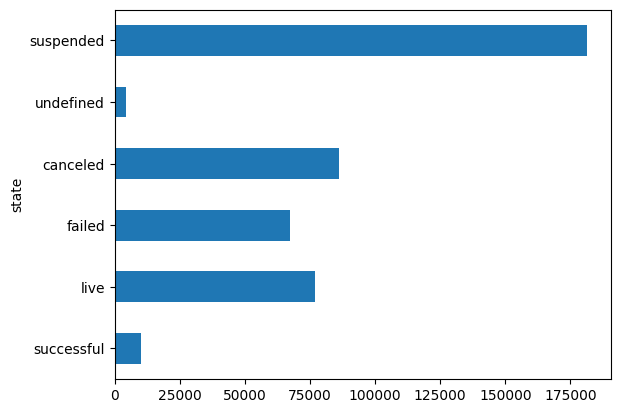

In [15]:
ks.groupby("state")["goal"].mean().plot.barh()

3. What is the distribution of the `state` variable across different categories?

You should create a table with one row per category and one column per state. The cell values should be the number of projects for each category-state pair, e.g.

| |Failed|Succeed|
|---|---|---|
|**Art**|100|60|
|**Food**|72|103|
|**Music**|1412|835|

(Note, this isn't real data, just an illustration of the structure you're aiming for!)

In [23]:
heat_map = ks.pivot_table(index="category",
                  columns="state",
                  values="ID",
                  aggfunc="count"
                  )
heat_map

C:\Users\ashut\AppData\Local\Temp\ipykernel_11332\983735654.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heat_map = ks.pivot_table(index="category",


state,successful,live,failed,canceled,undefined,suspended
category,,,,,,
Art,11510,194,14131,2222,0,96
Comics,5842,76,4036,842,0,23
Crafts,2115,76,5703,843,0,72
Dance,2338,18,1235,163,1,13
Design,10550,305,14814,4152,2,247
Fashion,5593,250,14182,2650,3,138
Film & Video,23623,332,32904,5755,854,117
Food,6085,184,15969,2211,0,153
Games,12518,287,16003,6202,1,220


4. Create a heatmap to visualise the table you created in step 3.

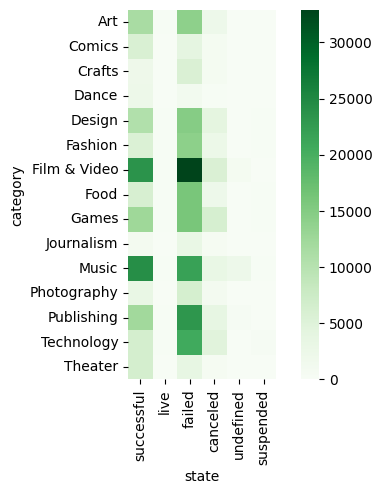

In [22]:
import seaborn as sns

_ = sns.heatmap(
    data=heat_map,
    vmin=0,
    cmap="Greens",
    square=True
)

5. We're going to find the projects that *nearly* made it.

5.a. First, create a column to calculate the pledged amount as a percentage of the project goal

In [25]:
ks["pledged_pct"]= ks["pledged"]/ks["goal"]
ks

,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,pledged_pct
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.000000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,0.080700
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,0.004889
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,0.000200
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,0.065795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,0.000500
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,0.103333
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,0.001333
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,0.013333


5.b. Now, write a Python function that determines is a project nearly made it.

The function should return True *only* if the following conditions are met for a single row:

- the goal was less than $100,000
- the state was `"failed"`
- the pledge as a percentage of the goal was over 90%

In [29]:
def is_successful(df):
    return ( df["goal"] < 100000 ) and (df["state"]=="failed") and (df["pledged_pct"]>0.9) 

5.c. Use `.apply` on your `DataFrame` to call your function on all rows. Save the result in a column which indicates whether a project nearly made it.

In [32]:
ks["is_successful"] = ks.apply(is_successful, axis = 1)
ks

,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,pledged_pct,is_successful
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.000000,False
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,0.080700,False
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,0.004889,False
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,0.000200,False
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,0.065795,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,0.000500,False
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,0.103333,False
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,0.001333,False
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,0.013333,False


5.d. Using your new column, how many projects nearly made it?

In [39]:
ks[ks["is_successful"]==True].shape[0]

is_successful
False    378474
True        187
Name: count, dtype: int64

<h1 style="color: #fcd805">Exercise: Changing names</h1>

We're going to investigate how the popularity of names has changed over time.

What names are popular changes over time. To illustrate this, several articles pointed out that in 2013 only 28 babies were named Gary in the UK, whereas it was once a much more popular choice.

Let's see how the popularity of names has changed in recent years.

Our data comes from the Office of National Statistics: [baby names](https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/livebirths/datasets/babynamesenglandandwalesbabynamesstatisticsboys).

## Part 1 - reading and cleaning the data

There are 3 Excel files for 2019, 2020, and 2021.

1. Start by opening the 2019 file in Excel. Find where the raw count data is located for England and Wales (we want a list of boys names and their counts in a single, long table).

Now, use the `read_excel` method in `pandas` to read the data into a `pandas` DataFrame.

_Note: You will need to investigate and change some of the options!_

In [69]:
import pandas as pd

boys = pd.read_excel("data/2019boysnames.xlsx", 
                      sheet_name = "Table 6",
                      skiprows = 5,
                    usecols = "A:C")



2. Drop any columns you don't need (`pandas` might have read in some empty data!)

In [70]:
boys = boys[boys.notna().all(axis=1)]
boys

,Rank,Name,Count3
0,1,OLIVER,4932.0
1,2,GEORGE,4575.0
2,3,NOAH,4265.0
3,4,ARTHUR,4211.0
4,5,HARRY,3823.0
...,...,...,...
6086,4702,ZORAN,3.0
6087,4702,ZSOMBOR,3.0
6088,4702,ZUBEYR,3.0
6089,4702,ZUHAYR,3.0


3. Use the `rename` function to rename any columns that need better names.

In [73]:
boys = boys.rename(columns = {"Count3": "Frequency"})
boys

,Rank,Name,Frequency
0,1,OLIVER,4932.0
1,2,GEORGE,4575.0
2,3,NOAH,4265.0
3,4,ARTHUR,4211.0
4,5,HARRY,3823.0
...,...,...,...
6086,4702,ZORAN,3.0
6087,4702,ZSOMBOR,3.0
6088,4702,ZUBEYR,3.0
6089,4702,ZUHAYR,3.0


4. Drop any rows you don't need. How can you identify rows that aren't actually part of your data?

In [ ]:
#Done above

5. Check the data types and convert any columns that need it.

In [80]:
boys.dtypes
boys["Frequency"] = boys["Frequency"].astype(int)
boys.dtypes
boys

,Rank,Name,Frequency
0,1,OLIVER,4932
1,2,GEORGE,4575
2,3,NOAH,4265
3,4,ARTHUR,4211
4,5,HARRY,3823
...,...,...,...
6086,4702,ZORAN,3
6087,4702,ZSOMBOR,3
6088,4702,ZUBEYR,3
6089,4702,ZUHAYR,3


6. Add a column to this DataFrame called `Year` which has the value 2019 for all rows.

In [82]:
boys["Year"] = 2019
boys

,Rank,Name,Frequency,Year
0,1,OLIVER,4932,2019
1,2,GEORGE,4575,2019
2,3,NOAH,4265,2019
3,4,ARTHUR,4211,2019
4,5,HARRY,3823,2019
...,...,...,...,...
6086,4702,ZORAN,3,2019
6087,4702,ZSOMBOR,3,2019
6088,4702,ZUBEYR,3,2019
6089,4702,ZUHAYR,3,2019


7. Repeat the process for the 2020 and 2021 files.

You should end up with 3 DataFrames, one for each year.

Things to ensure:

- add the `Year` column with the correct year to each `DataFrame`
- column names and data types should be identical in all `DataFrames`

_Note: don't just run the same code with a different filename! Open each file and check that the data is stored in the same way, and amend your code if it isn't._

In [91]:
boys2019 = pd.read_excel("data/2019boysnames.xlsx", 
                      sheet_name = "Table 6",
                      skiprows = 5,
                    usecols = "A:C")

boys2020 = pd.read_excel("data/2020boysnames.xlsx", 
                      sheet_name = "Table 6",
                      skiprows = 5,
                    usecols = "A:C")
boys2021 = pd.read_excel("data/2021boysnamesupdated1.xlsx", 
                      sheet_name = "6",
                      skiprows = 6,
                    usecols = "A:C")

boys2019 = boys2019.rename(columns = {"Count3": "Frequency"})
boys2019["Year"]=2019

boys2020 = boys2020.rename(columns = {"Count3": "Frequency"})
boys2020["Year"]=2020

boys2021 = boys2021.rename(columns = {"Count": "Frequency"})
boys2021["Year"]=2021


#names[names["Rank"]==1]


8. Use `pd.concat` to combine the 3 datasets into 1.

Call your combined DataFrame `names`.

In [94]:
names=pd.concat([boys2019,boys2020,boys2021])

names = names[names.notna().all(axis=1)]
names["Frequency"] = names["Frequency"].astype(int)
names

,Rank,Name,Frequency,Year
0,1,OLIVER,4932,2019
1,2,GEORGE,4575,2019
2,3,NOAH,4265,2019
3,4,ARTHUR,4211,2019
4,5,HARRY,3823,2019
...,...,...,...,...
6197,4789,Zlatan,3,2021
6198,4789,Zsombor,3,2021
6199,4789,Zuhaan,3,2021
6200,4789,Zuko,3,2021


9. Convert the name column to uppercase to ensure all names are uppercase

In [95]:
names["Name"]=names["Name"].str.upper()

10. Drop any missing values.

In [96]:
#done above

,Rank,Name,Frequency,Year
0,1,OLIVER,4932,2019
1,2,GEORGE,4575,2019
2,3,NOAH,4265,2019
3,4,ARTHUR,4211,2019
4,5,HARRY,3823,2019
...,...,...,...,...
6197,4789,ZLATAN,3,2021
6198,4789,ZSOMBOR,3,2021
6199,4789,ZUHAAN,3,2021
6200,4789,ZUKO,3,2021


11. Use your `names` `DataFrame` to see how many Garys were born in each year from 2019 to 2021.

In [98]:
names
names[names["Name"]=="GARY"]

,Rank,Name,Frequency,Year
1273,1253,GARY,20,2019
2126,2076,GARY,10,2020
1342,1329,GARY,19,2021


## Part 2 - analysis

Now that we have our raw data, let's investigate it.

1. How many names are there in each year?

In [100]:
names.value_counts("Year")

Year
2021    6202
2019    6091
2020    5978
Name: count, dtype: int64

2. Which name had the most occurrences in a given year across the entire data? That is, what is the highest number of occurrences of a name in the dataset?

In [104]:
max=names["Frequency"].max()
names[names["Frequency"]==max]

,Rank,Name,Frequency,Year
0,1,OLIVER,4932,2019


3. What is the most common first *letter* for boys' names?

In [180]:
names["Name_1"]=names["Name"].str[0]
names
names.value_counts("Name_1").head(5)
names=names.drop(columns = "Name_1")
names

,Rank,Name,Frequency,Year
0,1,OLIVER,4932,2019
1,2,GEORGE,4575,2019
2,3,NOAH,4265,2019
3,4,ARTHUR,4211,2019
4,5,HARRY,3823,2019
...,...,...,...,...
6197,4789,ZLATAN,3,2021
6198,4789,ZSOMBOR,3,2021
6199,4789,ZUHAAN,3,2021
6200,4789,ZUKO,3,2021


4. What are the 5 most common names overall? Save these names into a separate variable (e.g. a list or a `Series`).

In [184]:
top5 = names.groupby("Name")["Frequency"].sum().sort_values( ascending = False ).head(5).index.tolist()
top5

['OLIVER', 'NOAH', 'GEORGE', 'ARTHUR', 'MUHAMMAD']

5. Now filter the `names` `DataFrame` so that only the top 5 names are kept (one row per name per year, so 15 rows in total)

In [186]:
name5 =  names[names["Name"].isin(top5)]
name5

,Rank,Name,Frequency,Year
0,1,OLIVER,4932,2019
1,2,GEORGE,4575,2019
2,3,NOAH,4265,2019
3,4,ARTHUR,4211,2019
6,7,MUHAMMAD,3604,2019
0,1,OLIVER,4225,2020
1,2,GEORGE,4100,2020
2,3,ARTHUR,4052,2020
3,4,NOAH,4042,2020
4,5,MUHAMMAD,3710,2020


6. We are going to reshape this `DataFrame` to plot the frequency of each of the 5 names over time.

To do this, our data needs to be **one column per line** on our line plot.

In this case, that means:

- one column per name
- one row per year
- values in the cells are the count of a particular name in a particular year

Something like this (with dummy data):

| |John|Joseph|David|
|---|---|---|---|
|**2019**|100|60|44|
|**2020**|72|103|230|
|**2021**|142|435|374|

Reshape the `DataFrame` to achieve this format.

In [187]:
pv=name5.pivot_table( index = "Year", 
                    columns = "Name", 
                    values = "Frequency",
                    aggfunc = "sum")

pv

Name,ARTHUR,GEORGE,MUHAMMAD,NOAH,OLIVER
Year,,,,,
2019,4211,4575,3604,4265,4932
2020,4052,4100,3710,4042,4225
2021,3766,4141,3722,4525,4167


7. Call the `.plot` function on this data. You should see years on the x-axis, count on the y-axis and one line per name.

Use your knowledge of `matplotlib` to clean up the visualisation and make it more presentation-ready, such as:

- adding a title and axis labels
- changing the "tick labels" (the values along the axis)

<Axes: title={'center': 'Most Frequent Names'}, xlabel='Year', ylabel='Frequency'>

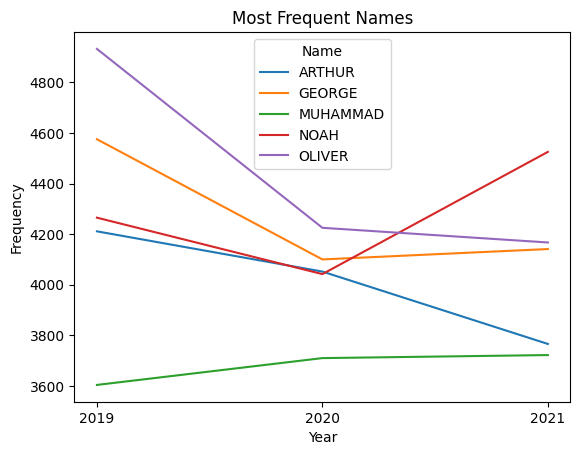

In [191]:
years_list = pv.index
years_list
pv.plot( xlabel= "Year", ylabel="Frequency",title = "Most Frequent Names",xticks=years_list)

8. Now create a similar table, this time to track each name's rank over time.

The table should have:

- one row per name
- one column per year
- the values should be the **rank** of a name in a particular year (NaNs may be present for names that didn't appear in all years)

Something like this:

| |2019|2020|2021|
|---|---|---|---|
|**Robert**|407|392|232|
|**Stephen**|101|75|44|
|**Graham**|502|507|509|

In [193]:
pv=names.pivot_table( index = "Name", 
                    columns = "Year", 
                    values = "Rank",
                    aggfunc = "sum")

pv

Year,2019,2020,2021
Name,,,
A,2104,3848,3451
A-JAY,NaN,2960,3451
AABAN,3937,3848,3990
AABID,3937,4608,NaN
AADAM,327,456,457
...,...,...,...
ZYAN,1869,2404,1329
ZYEON,NaN,4608,NaN
ZYGIMANTAS,4702,NaN,NaN


9. Create a column in this table called `diff` which is the difference of a name's rank between 2021 and 2019.

In [196]:
pv["diff"] = pv[2021] - pv[2019]
pv

Year,2019,2020,2021,diff
Name,,,,
A,2104,3848,3451,1347
A-JAY,NaN,2960,3451,NaN
AABAN,3937,3848,3990,53
AABID,3937,4608,NaN,NaN
AADAM,327,456,457,130
...,...,...,...,...
ZYAN,1869,2404,1329,-540
ZYEON,NaN,4608,NaN,NaN
ZYGIMANTAS,4702,NaN,NaN,NaN


10. Which names have moved up the most in the rankings and which ones have fallen the most?

_Note: remember, in rankings, the lower the better!_

In [199]:
pv.sort_values("diff").head(10)

Year,2019,2020,2021,diff
Name,,,,
SANAD,4702,2404,1391,-3311
FERDINAND,4702,2228,1595,-3107
VIAN,4702,1723,1688,-3014
MANKIRAT,4702,3848,1688,-3014
RAFFY,3937,2076,1078,-2859
PAXTON,4702,2228,1860,-2842
RIVEN,4702,4608,1860,-2842
EVEREST,4702,3334,1984,-2718
AL,4702,2960,1984,-2718


In [200]:
pv.sort_values("diff", ascending = False).head(10)

Year,2019,2020,2021,diff
Name,,,,
AILBE,1506,3848,4789,3283
HIRO,1655,3848,4789,3134
HAMDAAN,1745,3848,4789,3044
KAMERON,1745,2228,4789,3044
RUHAN,1745,2682,4789,3044
REISS,1869,3848,4789,2920
JONJO,1869,2404,4789,2920
KALLUM,1986,1825,4789,2803
BURHANUDDIN,1986,3334,4789,2803
